In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
sns.set_context("talk")

In [6]:
data=pd.read_csv("example_retail_sales.csv",parse_dates=["ds"],index_col=["ds"])

In [7]:
data

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068
...,...
2016-01-01,400928
2016-02-01,413554
2016-03-01,460093


Text(0, 0.5, 'Sales')

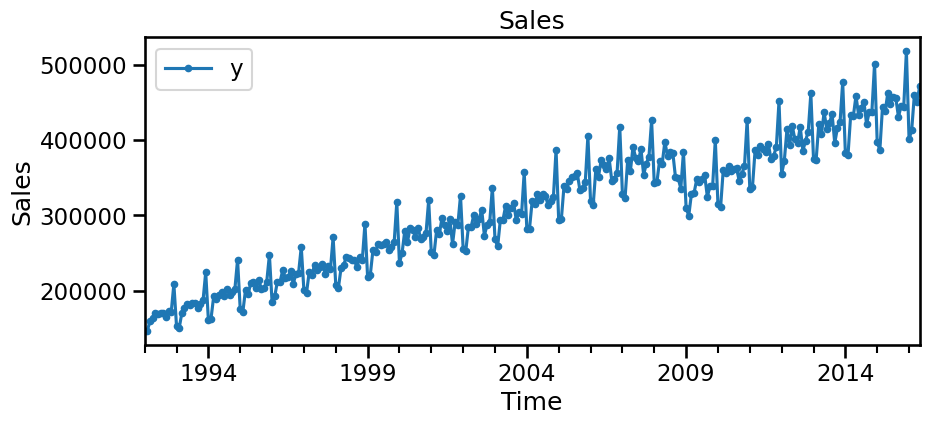

In [8]:
ax=data.plot(figsize=[10,4],marker=".")
ax.set_title("Sales")
ax.set_xlabel("Time")
ax.set_ylabel("Sales")

# Using STL to compute Trend and Seasonality

In [17]:
#stl decomposition
r=STL(
    endog=data["y"],
    period=12,
    seasonal=7,# determines the windows sizes for loess for cycle-subquries
    robust=True   
).fit()

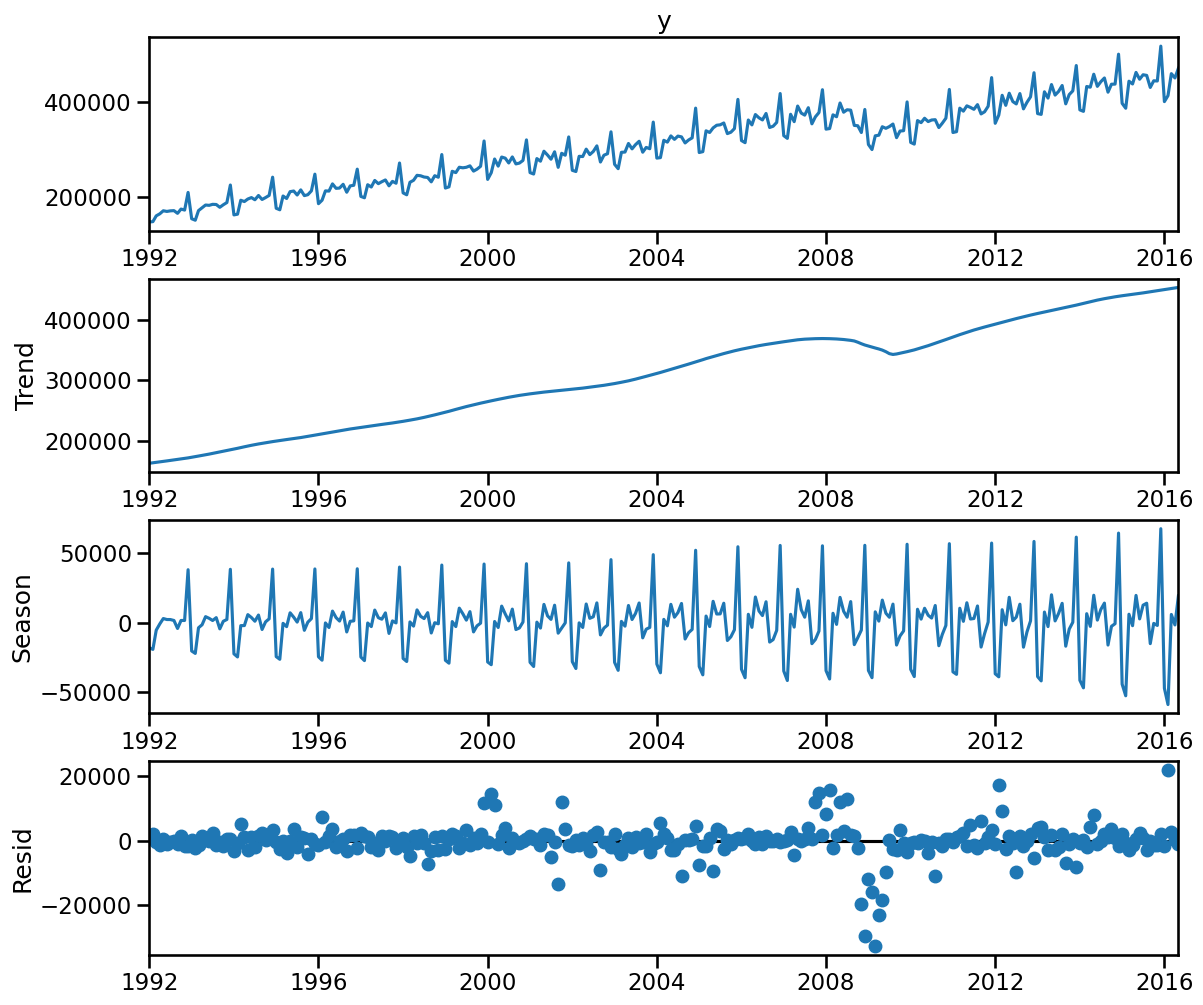

In [20]:
plt.rc("figure",figsize=(12,10))
plt.rc("font",size=5)
r.plot();

In [21]:
data["trend"]=r.trend
data["seasonality"]=r.seasonal
data.head()

,y,trend,seasonality
ds,,,
1992-01-01,146376,163507.268049,-18105.934264
1992-02-01,147079,164270.425274,-19220.032341
1992-03-01,159336,165042.317260,-5396.563294
1992-04-01,163669,165822.245976,-885.576431
1992-05-01,170068,166609.427740,2929.056385


Text(0, 0.5, 'Time')

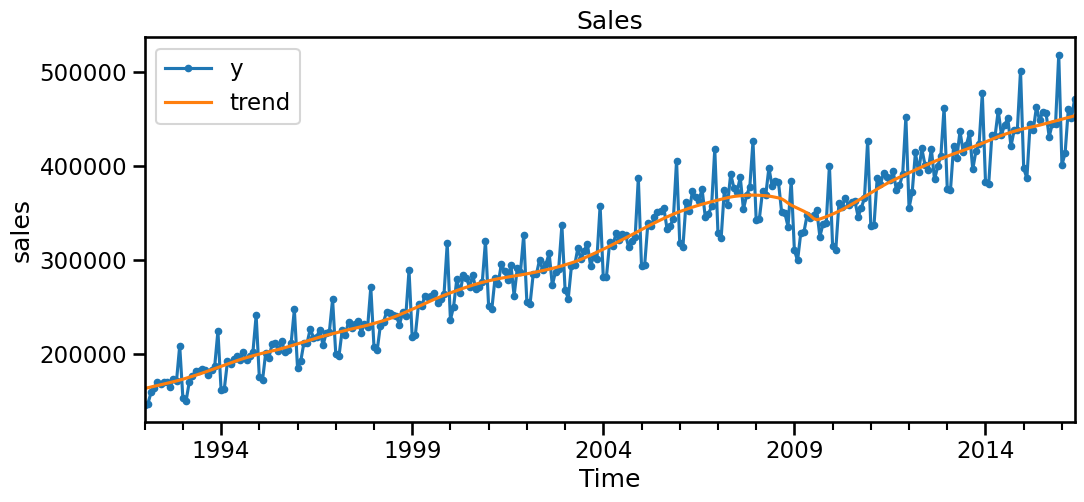

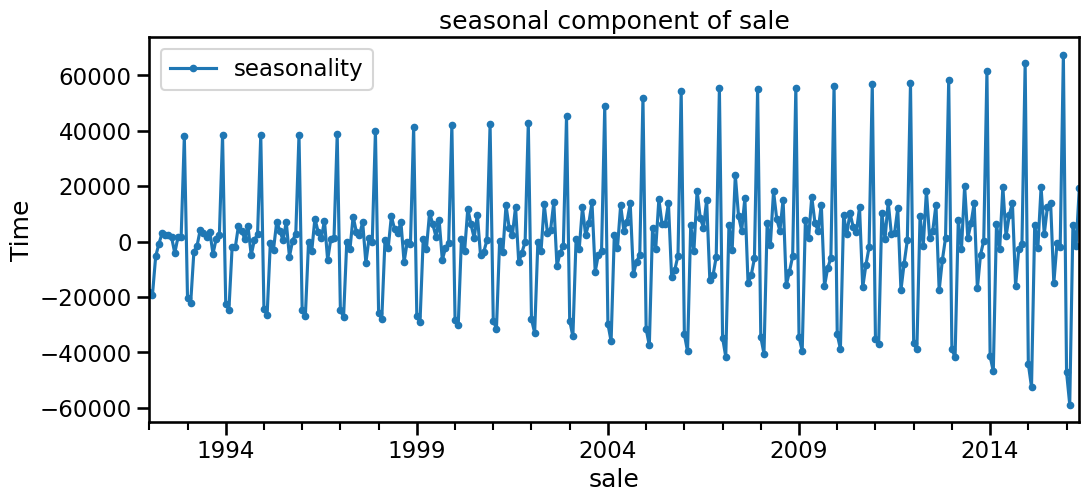

In [22]:
fig,ax=plt.subplots(figsize=[12,5])
data.plot(y='y',marker=".",ax=ax)
data.plot(y="trend",ax=ax)
ax.set_title("Sales")
ax.set_xlabel("Time")
ax.set_ylabel("sales")

fig,ax=plt.subplots(figsize=[12,5])
data.plot(y="seasonality",marker=".",ax=ax)
ax.set_title("seasonal component of sale")
ax.set_xlabel("sale")
ax.set_ylabel("Time")


# constant seasonality

In [23]:
r=STL(
    endog=data["y"],
    period=12,
    seasonal=7,# determines the windows sizes for loess for cycle-subquries
    robust=True   
).fit()
data["trend"]=r.trend
data["seasonality"]=r.seasonal
data["detrended"]=data["y"]-data["trend"]

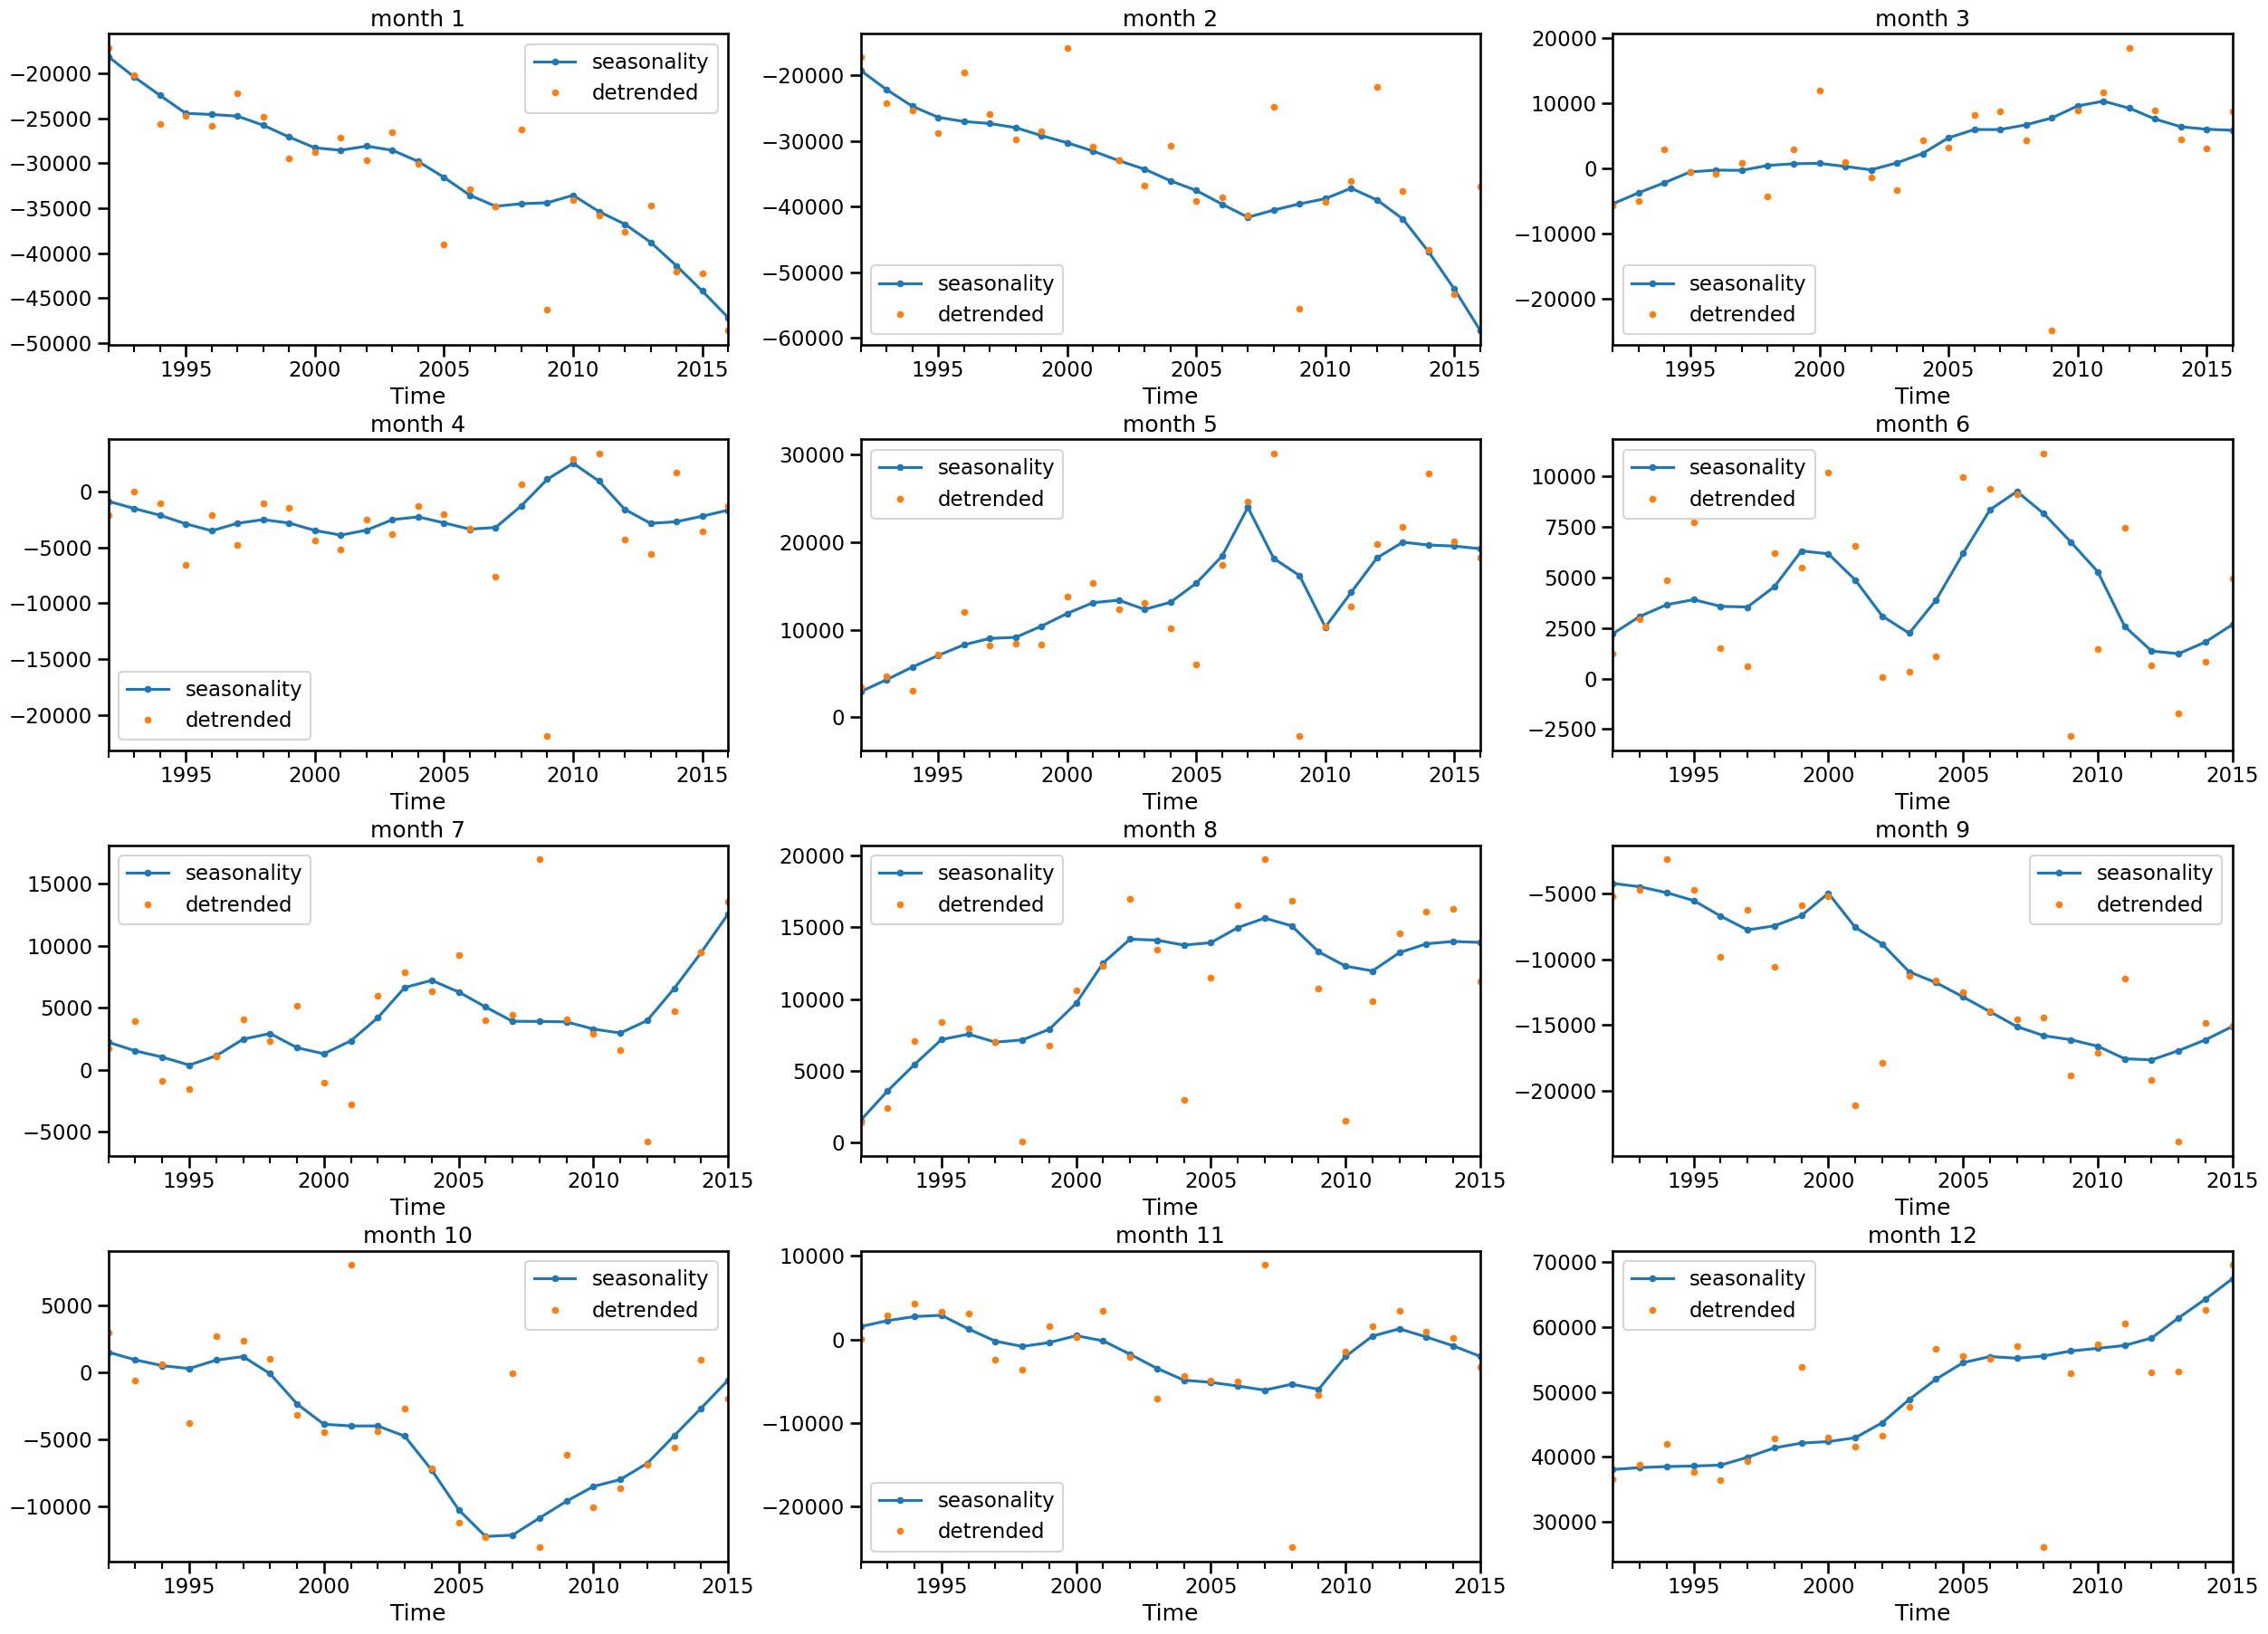

In [26]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=[25, 18])
ax = ax.flatten()
for i in range(0, 12):
    data[data.index.month == i + 1].plot(y="seasonality", marker=".", ax=ax[i])
    data[data.index.month == i + 1].plot(
        y="detrended", marker=".", linestyle="", ax=ax[i]
    )
    ax[i].set_title(f"month {i+1}")
    ax[i].set_xlabel("Time")

plt.tight_layout()

In [28]:
r=STL(
    endog=data["y"],
    period=12,
    seasonal=2001,# determines the windows sizes for loess for cycle-subquries
    seasonal_deg=0,
    robust=True   
).fit()

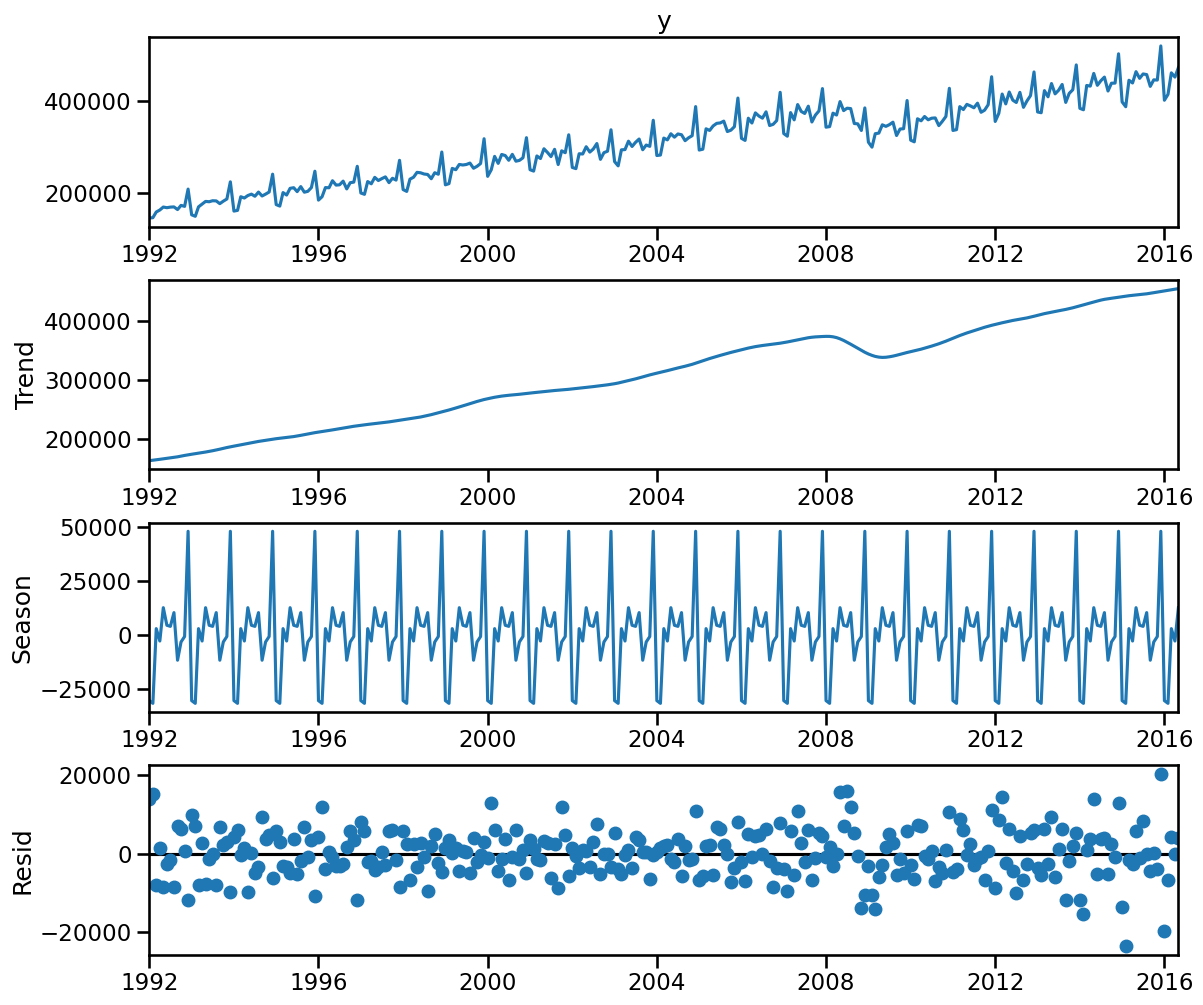

In [29]:
plt.rc("figure",figsize=(12,10))
plt.rc("font",size=5)
r.plot();

In [ ]:
data["trend"] = r.trend
data["seasonal"] = r.seasonal
data["y_detrended"] = data["y"] - data["trend"]

# Plot the cycle-subseries
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=[15, 20])
ax = ax.flatten()
for i in range(0, 12):
    d[df.index.month == i + 1].plot(y="seasonal", marker=".", ax=ax[i])
    df[df.index.month == i + 1].plot(
        y="y_detrended", marker=".", linestyle="", ax=ax[i]
    )
    ax[i].set_title(f"month {i+1}")
    ax[i].set_xlabel("Time")

plt.tight_layout()